# Analysis on Colin Kaepernick and the Nike Backlash

As part of the [Kaggle: 5,000 #JustDoIt! Tweets Dataset](https://www.kaggle.com/eliasdabbas/5000-justdoit-tweets-dataset), we will see to perform analysis on the tweets responding to Nike's campaign endoresement for Colin Kaepernick. For those un aware, at the beginning of the NFL 2018-2019 season, Nike made an endorement deal with Colin Kaepernick that sparked a wide spread backlash and support. Last season, Colin Kaepernick and other NFL players began showing protest during the NFL national anthem due to an all to common occurance of police brutality, racial inequality among other issues. 

We will be performing analysis on the various topic trends from Twitter to determine and depection of the various fans recations both in support and urging a boycott of some of Nike's apparals. 


![](https://d3i6fh83elv35t.cloudfront.net/static/2018/09/colin-kaepernick-nike-1024x575.jpeg)

In [3]:
import pandas as pd

# Data Visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style

In [2]:
data = pd.read_csv('justdoit_tweets_2018_09_07_2.csv')
data.head(3)

,tweet_contributors,tweet_coordinates,tweet_created_at,tweet_display_text_range,tweet_entities,tweet_extended_entities,tweet_favorite_count,tweet_favorited,tweet_full_text,tweet_geo,...,user_profile_text_color,user_profile_use_background_image,user_protected,user_screen_name,user_statuses_count,user_time_zone,user_translator_type,user_url,user_utc_offset,user_verified
0,NaN,NaN,Fri Sep 07 16:25:06 +0000 2018,"[0, 75]","{'hashtags': [{'text': 'quote', 'indices': [47...","{'media': [{'id': 1038100853872197632, 'id_str...",0,False,Done is better than perfect. — Sheryl Sandberg...,NaN,...,333333,True,False,UltraYOUwoman,91870.0,NaN,none,https://t.co/jGlJswxjwS,NaN,False
1,NaN,NaN,Fri Sep 07 16:24:59 +0000 2018,"[0, 237]","{'hashtags': [{'text': 'hero', 'indices': [90,...",NaN,0,False,Shout out to the Great Fire Department and the...,NaN,...,333333,True,False,yungcutup,618822.0,NaN,none,http://t.co/lVm8vfDbfO,NaN,False
2,NaN,NaN,Fri Sep 07 16:24:50 +0000 2018,"[0, 176]","{'hashtags': [{'text': 'JustDoIt', 'indices': ...","{'media': [{'id': 1038100773396041728, 'id_str...",0,False,There are some AMAZINGLY hilarious Nike Ad mem...,NaN,...,050505,True,False,rachelbogle,48075.0,NaN,none,https://t.co/g9exqgZp9x,NaN,True


column names

In [4]:
data.columns

Index(['tweet_contributors', 'tweet_coordinates', 'tweet_created_at',
       'tweet_display_text_range', 'tweet_entities', 'tweet_extended_entities',
       'tweet_favorite_count', 'tweet_favorited', 'tweet_full_text',
       'tweet_geo', 'tweet_id', 'tweet_id_str',
       'tweet_in_reply_to_screen_name', 'tweet_in_reply_to_status_id',
       'tweet_in_reply_to_status_id_str', 'tweet_in_reply_to_user_id',
       'tweet_in_reply_to_user_id_str', 'tweet_is_quote_status', 'tweet_lang',
       'tweet_metadata', 'tweet_place', 'tweet_possibly_sensitive',
       'tweet_quoted_status', 'tweet_quoted_status_id',
       'tweet_quoted_status_id_str', 'tweet_retweet_count', 'tweet_retweeted',
       'tweet_source', 'tweet_truncated', 'tweet_user',
       'user_contributors_enabled', 'user_created_at', 'user_default_profile',
       'user_default_profile_image', 'user_description', 'user_entities',
       'user_favourites_count', 'user_follow_request_sent',
       'user_followers_count', 'user_fol

## Data Processing & Exporatory

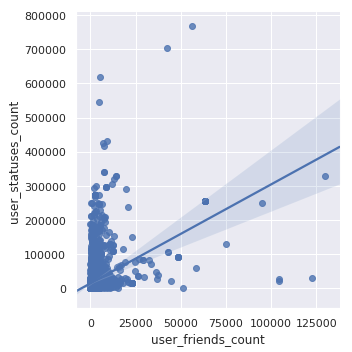

In [12]:
sns.lmplot(x='user_friends_count', y='user_statuses_count', data = data)

In [7]:
data.tweet_extended_entities[0]

"{'media': [{'id': 1038100853872197632, 'id_str': '1038100853872197632', 'indices': [76, 99], 'media_url': 'http://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DmgTOfwVAAAJqoh.jpg', 'url': 'https://t.co/J9lLdszdW6', 'display_url': 'pic.twitter.com/J9lLdszdW6', 'expanded_url': 'https://twitter.com/UltraYOUwoman/status/1038100857932394496/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 612, 'h': 612, 'resize': 'fit'}, 'large': {'w': 612, 'h': 612, 'resize': 'fit'}, 'medium': {'w': 612, 'h': 612, 'resize': 'fit'}}}]}"

In [13]:
data.tweet_full_text[1]

'Shout out to the Great Fire Department and the tour! 👨\u200d🚒👨\u200d🚒 Much love to NYC! 💯🎥🔥✊🏿\n•\n•\n•\n#hero #fdny #likesforlikes #promo #music #instagood #instadaily #postoftheday #bestoftheday #justdoit #nike #picoftheday... https://t.co/sFobQ2ukpo'

In [15]:
test_text = data.tweet_full_text[:20]

Text preprocessing

In [17]:
import re

def preprocess_post(post):
    post = ''.join(c for c in post if not c.isdigit())
    post = post.lower()
    post = re.sub('\n', ' ', post)
    post = re.sub(r'[^\w\s]','',post)
    
    
    return post

In [22]:
txt = data.tweet_full_text[:20].map(lambda x: preprocess_post(x))

In [26]:
txt

0     done is better than perfect  sheryl sandberg q...
1     shout out to the great fire department and the...
2     there are some amazingly hilarious nike ad mem...
3     kapernickeffect swoosh justdoit  lucas bishops...
4     one hand one dream the shaquem griffin story  ...
5     realdonaldtrump its time for me to stock up on...
6     why wont trump protect our elections  think it...
7     nike good job on shaking the whole world i see...
8     great way to meet good peoplewearing your nike...
9     leadtrade and succeed with icm please retweet ...
10         my favorites so far justdoit httpstcozyvdaqx
11    colin kaepernicks business partner nike sends ...
12    cspensions why be a cat when you can be a lion...
13    realdonaldtrump they were thinking history wil...
14    repadamschiff go ahead repadamschiff   justdoi...
15    why be a cat when you can be a lion justdoit h...
16    socialism be like me and justdoit because ya k...
17    hey nike i stood for our country i served 

In [27]:
txt[19]

'abortion stops a beating heart just imagine all the lives we can save if we get kavanaugh on the court democrats should be eager to confirm him for the sake of our children justdoit'